In [12]:
import numpy as np
import pylab as p
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm
import networkx as nx

import math
import timeit
import itertools 

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

from scipy.optimize import fsolve
from scipy import integrate
from matplotlib import animation, rc

In [41]:
#parameters
n = 10

gamm = 1.2
m=1.5
beta=2
    
b = (np.random.rand(n,1) - 0.5)*10
nu1d = (np.random.rand(n,1) - 0.5)*10
nu2d = (np.random.rand(n,n) - 0.5)*10
omega = (np.random.rand(n,n) - 0.5)*10

k = np.random.rand(1)*10
alp = (np.random.rand(n,n) -0.5)*10

#computation
S_star = m/beta
T_star = 1 - S_star
I_star = m*T_star/(m + beta*k*T_star)
J_star = T_star - I_star

detP =  2*(T_star)**2-I_star*J_star 

teth1 = 0 # -2*m*(T_star)**2/detP
teth2 = 0 # gamm*I_star*(I_star + T_star)/detP
teth3 = 0 #gamm*T_star*J_star/detP
teth4 = 2*m*T_star*J_star/detP
teth5 = 0 #beta*T_star*I_star*J_star/detP


lamd = np.zeros((n,n))
for i in range (0, n):
    for j in range (0, n):
        lamd[i][j] = teth1*(b[i] - b[j]) + teth2*(nu1d[i] - nu1d[j]) + teth3*(nu2d[i][j] + nu2d[j][i] - 2*nu2d[j][j]) + teth4*(omega[i][j] - omega[j][i]) + teth5*(I_star/J_star*(alp[j][i] - alp[i][j]) + alp[j][i] - alp[j][j])
        #replicator system
def du_dt(u, t = 0):
    return u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))

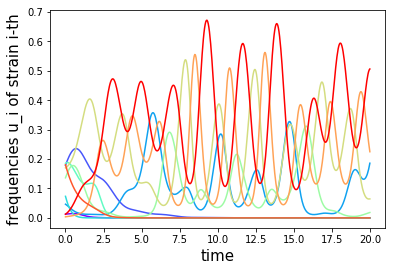

In [54]:
u0 = np.random.random(n) #random initial data
u0 = u0/sum(u0)

t = np.linspace(0, 20, 500)

u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
infodict['message']
s = []
for i in range(0, n):
    s.append(u.T[i])
    
colors = cm.rainbow(np.linspace(0, 1, n))

for i in range(0, n):
    plt.plot(t, s[i], color = colors[i])

plt.xlabel("time", fontsize = 15)
plt.ylabel("frequencies u_i of strain i-th", fontsize = 15)
plt.show()

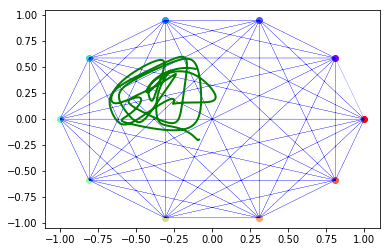

In [55]:
A = []
B = []

for i in range (0, n):
    plt.plot([math.cos((i+1)*2*np.pi/n)],[math.sin((i+1)*2*np.pi/n)], marker = 'o', color = colors[i])
    A.append(math.cos((i+1)*2*np.pi/n))
    B.append(math.sin((i+1)*2*np.pi/n))

all_data = []
for i in range (0,n):
    all_data.append([A[i],B[i]])
    
plt.plot(
    *zip(*itertools.chain.from_iterable(itertools.combinations(all_data, 2))),
    color = 'b', linewidth = 0.2)

orb_x = np.zeros(len(t))
orb_y = np.zeros(len(t))

for i in range (n):
    orb_x = orb_x + A[i]*s[i]
    orb_y = orb_y + B[i]*s[i]

plt.plot(orb_y, orb_x, 'green', linewidth = 2)
plt.show()

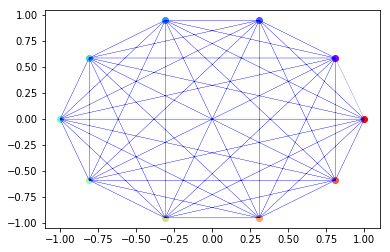

In [56]:
#define the name of the axe with the following
fig,ax = plt.subplots()

#plot the figure with 6 vertices
for j in range (0, n):
    ax.plot([math.cos((j+1)*2*np.pi/n)],[math.sin((j+1)*2*np.pi/n)], marker = 'o', color = colors[j])

ax.plot(
    *zip(*itertools.chain.from_iterable(itertools.combinations(all_data, 2))),
    color = 'b', linewidth = 0.2)

#animation part
frame_t = [i[0] for i in enumerate(t) if i[0]%50==0]

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line

# animation function
#I change the code in order to keep the trace of all the trajectory between 0 and T[i]
def animate(i):
    x = orb_x[:i+1]
    y = orb_y[:i+1]
    line.set_data(x, y)
    return line

#animate scatter plot
ani = animation.FuncAnimation(fig, animate, frames = frame_t, init_func = init, blit = False)
from IPython.display import HTML
HTML(ani.to_jshtml())

#almost no effect in a notebook#
#try to use other stuff than a notebook. Keep the notebook for a synthetic presentation.

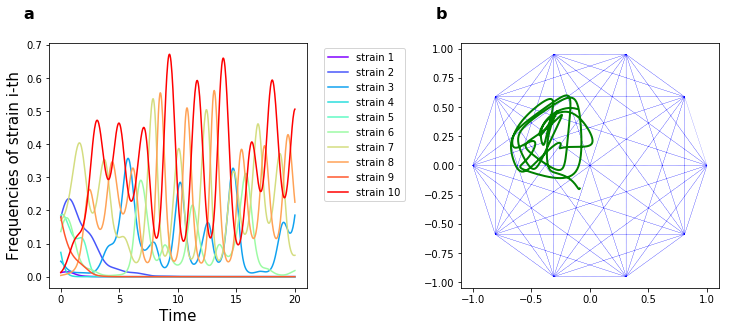

In [57]:
#mywriter = animation.FFMpegWriter()
#ani.save('video.mp4', writer = mywriter)
labels = []
for i in range(0,n):
    labels.append('strain {}'.format(i+1))
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4.5))
fig.subplots_adjust(wspace = 0.6)

for i in range(0, n):
    ax1.plot(t, s[i], color = colors[i], label =labels[i])

ax1.set_xlabel("Time", fontsize = 15)
ax1.set_ylabel("Frequencies of strain i-th", fontsize = 15)

ax2.plot(
    *zip(*itertools.chain.from_iterable(itertools.combinations(all_data, 2))),
     'b--', linewidth = 0.2)

ax2.plot(orb_y, orb_x, 'green', linewidth = 2)

ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, size=16, weight='bold')
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, size=16, weight='bold')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')